In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.rcParams.update({
    'text.latex.preamble': r'\usepackage{amsfonts}\usepackage{bm}'
})

In [3]:
df1 = pd.read_csv("../results/mmdew-univariate.csv", index_col=0)
df2 = pd.read_csv("../results/mmd-univariate.csv", index_col=0)
df3 = pd.read_csv("../results/focus-univariate.csv", index_col=0)
df4 = pd.read_csv("../results/cpm-univariate.csv", index_col=0)
df = pd.concat((df1,df2,df3,df4))

In [4]:
df.head()

,test_stat,algorithm,experiment
0,0.000000,MMDEW,Covariance shift
1,1.434178,MMDEW,Covariance shift
2,1.289996,MMDEW,Covariance shift
3,1.166558,MMDEW,Covariance shift
4,1.292990,MMDEW,Covariance shift


In [5]:
df = df.reset_index(names=["x"])

In [6]:
df = df[df["x"] > 400]
df = df[df["x"] < 550]

In [18]:
df["x"] += 1 # to account for zero-based indexing

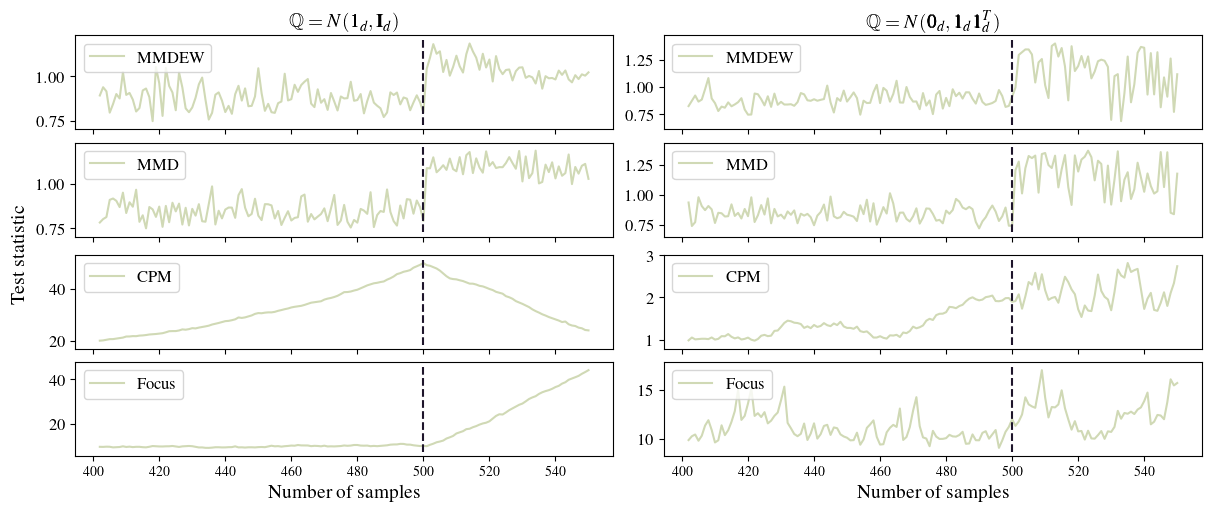

In [23]:
with sns.cubehelix_palette(1, start=0.5, rot=-0.75, gamma=1.2):
    fig, ((ax11,ax12), (ax21, ax22), (ax31,ax32), (ax41,ax42)) = plt.subplots(4,2,sharex=True,figsize=(12,5),layout="constrained")
    for alg, ax in zip(["MMDEW", "MMD", "CPM", "Focus"], [ax11, ax21, ax31, ax41]):
        sns.lineplot(data=df[(df["experiment"]=="Mean shift") & (df["algorithm"]==alg)],x="x",y="test_stat",ax=ax,label=alg)
    for alg, ax in zip(["MMDEW", "MMD", "CPM", "Focus"], [ax12, ax22, ax32, ax42]):
        sns.lineplot(data=df[(df["experiment"]=="Covariance shift") & (df["algorithm"]==alg)],x="x",y="test_stat",ax=ax,label=alg)
    
    ax11.set_title(r"$\mathbb Q = N(\bm 1_d,\textbf{I}_d)$")
    ax12.set_title(r"$\mathbb Q = N(\bm 0_d,\bm 1_d \bm 1_d^T)$")

    for ax in [ax11,ax12,ax21,ax22,ax31,ax32,ax41,ax42]:
        ax.vlines(x=500,**{ k : v for k,v in zip(["ymin","ymax"], ax.get_ylim())},colors=[0.11877302857891296, 0.0805561119529872, 0.16976256156385605],linestyles="dashed")
        ax.set_ylabel("")
        ax.legend(loc="upper left")

    ax41.set_xlabel("Number of samples")
    ax42.set_xlabel("Number of samples")

    fig.supylabel('Test statistic')

    plt.savefig("../../mmdew-article/fig/synth-uniform.pdf", bbox_inches="tight", pad_inches=0)

In [9]:
ax11.get_ylim()

(np.float64(0.7279907742909184), np.float64(1.202910455275409))

In [10]:
{ k : v for k,v in zip(["ymin","ymax"], ax11.get_ylim())}

{'ymin': np.float64(0.7279907742909184), 'ymax': np.float64(1.202910455275409)}

In [22]:
sns.cubehelix_palette(2, start=0.5, rot=-0.75, gamma=1.2)[1]

[0.11877302857891296, 0.0805561119529872, 0.16976256156385605]